# PREPROCESSING THE DATASET

In [1]:
#import required modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy
import matplotlib.pyplot as plt

In [2]:
#reading the dataset header names
dataheader=pd.read_csv("eighthr.names.csv",header=None)
dataheader=dataheader.iloc[1:,0]
dataheader

1     WSR0:     continuous.
2     WSR1:     continuous.
3     WSR2:     continuous.
4     WSR3:     continuous.
5     WSR4:     continuous.
              ...          
68      KI:     continuous.
69      TT:     continuous.
70     SLP:     continuous.
71    SLP_:     continuous.
72    Precp:    continuous.
Name: 0, Length: 72, dtype: object

In [3]:
#creating editted the dataset header list
dh=[]
for i in dataheader:
    s=""
    #print(i)
    for j in i:
        
        if j!=':':
           s=s+j
        else:
            break
    dh.append(s)
dh.append("class")
dh1=dh
dh=pd.Series(dh)
dh

0      WSR0
1      WSR1
2      WSR2
3      WSR3
4      WSR4
      ...  
68       TT
69      SLP
70     SLP_
71    Precp
72    class
Length: 73, dtype: object

In [4]:
#creating the dataset
dataset=pd.read_csv("eighthr.data.csv",header=None,names=dh)
ds=dataset.replace("?",np.NaN)
ds

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,class
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0
2530,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,2,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0


In [5]:
ds.drop_duplicates(subset=dh1,inplace=True)

In [6]:
#converting the values in cells from string to float
for i in range(72):
    ds.iloc[:,i]=ds.iloc[:,i].astype(float)

In [7]:
#checking if there exists any missing values
miss=ds.isnull().sum()/len(ds)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Precp    0.000792
SLP      0.034442
HT85     0.034442
T85      0.036025
HT70     0.036421
           ...   
WSR2     0.113222
WSR20    0.113222
WSR23    0.114410
WSR0     0.115202
WSR22    0.115598
Length: 72, dtype: float64

In [8]:
#filling the NaN values by using interpolating process
ds.interpolate(inplace=True)

In [9]:
#checking if there exists any missing values
miss=ds.isnull().sum()/len(ds)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

In [10]:
#filling the NaN values with the mean value of the column

#ds.fillna(ds.mean(),inplace=True)

In [11]:
#checking the final dataset
ds

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,class
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.670,-1.56,5795.0,-12.10,17.900,10330.0,-55.000000,0.00,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.390,3.84,5805.0,14.05,29.000,10275.0,-55.000000,0.00,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.60,6.940,9.80,5790.0,17.90,41.300,10235.0,-40.000000,0.00,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.730,10.54,5775.0,31.15,51.700,10195.0,-40.000000,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,0.29,10.355,10.91,5772.5,29.55,48.975,10157.5,-53.333333,0.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.930,-4.41,5800.0,-25.60,21.800,10295.0,65.000000,0.00,0
2530,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.950,-1.14,5845.0,-19.40,19.100,10310.0,15.000000,0.00,0
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.800,-0.64,5845.0,-9.60,35.200,10275.0,-35.000000,0.00,0
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,0.25,7.720,-0.89,5845.0,-19.60,34.200,10245.0,-30.000000,0.05,0


<br> 
# CREATING TRAINING  AND TESTING DATASETS

In [12]:
#separating dataset into features and lables
x=ds.iloc[:,0:72]
y=ds.iloc[:,72]

In [13]:
#checking the input/features data
x

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,-15.5,0.15,10.670,-1.56,5795.0,-12.10,17.900,10330.0,-55.000000,0.00
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,-14.5,0.48,8.390,3.84,5805.0,14.05,29.000,10275.0,-55.000000,0.00
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,-15.9,0.60,6.940,9.80,5790.0,17.90,41.300,10235.0,-40.000000,0.00
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,-16.8,0.49,8.730,10.54,5775.0,31.15,51.700,10195.0,-40.000000,2.08
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,-14.3,0.29,10.355,10.91,5772.5,29.55,48.975,10157.5,-53.333333,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,-12.4,0.07,7.930,-4.41,5800.0,-25.60,21.800,10295.0,65.000000,0.00
2530,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,-12.0,0.04,5.950,-1.14,5845.0,-19.40,19.100,10310.0,15.000000,0.00
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,-11.8,0.06,7.800,-0.64,5845.0,-9.60,35.200,10275.0,-35.000000,0.00
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,-10.8,0.25,7.720,-0.89,5845.0,-19.60,34.200,10245.0,-30.000000,0.05


In [14]:
#checking the output/label data
y

0       0
1       0
2       0
3       0
4       0
       ..
2529    0
2530    0
2531    0
2532    0
2533    0
Name: class, Length: 2526, dtype: int64

In [15]:
#spliting x and y into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state=50)

In [16]:
#creating a list to store the best accuracy of the models
best=[]

<br> 
# K NEAREST NEIGHBOUR CLASSIFIER

In [17]:
#importing module to use knn classifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
#train knn classifier on training dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
#predict the output on testing data and check the accuracy
y_predict=knn.predict(x_test)
print(accuracy(y_test,y_predict))

0.9287833827893175


[0.9060336300692384, 0.9307616221562809, 0.9208704253214639, 0.9327398615232443, 0.9287833827893175, 0.9307616221562809, 0.9287833827893175, 0.9287833827893175, 0.9297725024727992, 0.9307616221562809, 0.9297725024727992, 0.9317507418397626, 0.9327398615232443, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626, 0.9317507418397626,

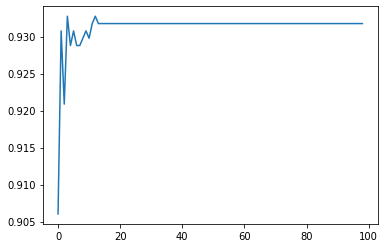

In [20]:
#changing hyperparameter to see which value gives the best result
score1=[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_predict=knn.predict(x_test)
    score1.append(accuracy(y_test,y_predict))
print(score1)
plt.plot(score1)

In [21]:
#checking which value of hyperparameter gave the best result
print("k =",score1.index(max(score1))+1,"gives best accuracy of",max(score1))

k = 4 gives best accuracy of 0.9327398615232443


In [22]:
#taking the accuracy of knn classifier of comparison
best.append(max(score1))

<br> 
# RANDOM FOREST CLASSIFIER

In [23]:
#importing module to use random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
#train random forest classifier on training dataset
rfc=RandomForestClassifier(n_estimators=4)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
#predict the output on testing data and check the accuracy
y_predict=rfc.predict(x_test)
print(accuracy(y_test,y_predict))

0.9386745796241345


[0.897131552917903, 0.9287833827893175, 0.923837784371909, 0.933728981206726, 0.9208704253214639, 0.9347181008902077, 0.933728981206726, 0.9396636993076162, 0.9347181008902077, 0.9347181008902077, 0.9357072205736894, 0.9386745796241345, 0.9396636993076162, 0.9357072205736894, 0.9297725024727992, 0.9366963402571711, 0.9436201780415431, 0.9396636993076162, 0.9406528189910979, 0.9376854599406528, 0.9366963402571711, 0.9406528189910979, 0.9396636993076162, 0.9366963402571711, 0.9396636993076162, 0.9347181008902077, 0.9406528189910979, 0.9366963402571711, 0.9436201780415431, 0.9406528189910979, 0.9406528189910979, 0.9396636993076162, 0.9416419386745796, 0.9396636993076162, 0.9406528189910979, 0.9396636993076162, 0.9366963402571711, 0.9416419386745796, 0.9406528189910979, 0.9376854599406528, 0.9406528189910979, 0.9406528189910979, 0.9347181008902077, 0.9357072205736894, 0.9406528189910979, 0.9416419386745796, 0.9416419386745796, 0.9416419386745796, 0.9386745796241345, 0.9406528189910979, 0.9

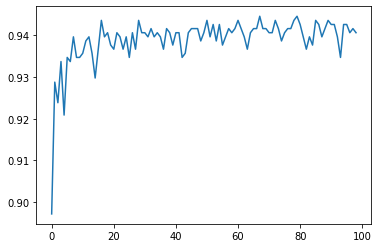

In [26]:
#changing hyperparameter to see which value gives the best result
score2=[]
for k in range(1,100):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    y_predict=rfc.predict(x_test)
    score2.append(accuracy(y_test,y_predict))
print(score2)
plt.plot(score2)

In [27]:
#checking which value of hyperparameter gave the best result
print("k =",score2.index(max(score2))+1,"gives best accuracy of",max(score2))

k = 68 gives best accuracy of 0.9446092977250248


In [28]:
#taking the accuracy of random forest classifier of comparison
best.append(max(score2))

<br> 
# SUPPORT VECTOR MACHINE CLASSIFIER

In [29]:
#importing module to use support vector machine classifier
from sklearn import svm

In [30]:
#train support vector machine classifier on training dataset
svmc=svm.SVC(gamma='auto')
svmc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
#predict the output on testing data and check the accuracy
y_predict=svmc.predict(x_test)
print("gives best accuracy score of",accuracy(y_test,y_predict))

gives best accuracy score of 0.9317507418397626


In [32]:
#taking the accuracy of random forest classifier of comparison
best.append(accuracy(y_test,y_predict))

<br> 
# THE BEST CLASSIFIER MODEL FOR THIS DATASET

In [33]:
#finding the max out of the ‘best’ list to find out who performed the best
x=best.index(max(best))
if x==0:
    print("K NEAREST NEIGHBOUR IS THE BEST CLASSIFIER")
elif x==1:
    print("RANDOM FOREST IS THE BEST CLASSIFIER")
else:
    print("SUPPORT VECTOR MACHINE IS THE BEST CLASSIFIER")
    

RANDOM FOREST IS THE BEST CLASSIFIER
